### Importamos librerías

In [21]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
porbarrios = gpd.read_file("dfencuestadosporbarrio.csv").drop(columns = ["geometry"])
porbarrios = porbarrios.apply(lambda x: x.astype(str).str.upper())
porbarrios.rename(columns = {'index':'BARRIO'}, inplace = True) 

In [23]:
barrio = gpd.read_file("barrios_badata.shp").drop(columns=["OBJETO"])
barrio.head(5)

,BARRIO,COMUNA,PERIMETRO,AREA,geometry
0,CHACARITA,15.0,7724.852955,3.115707e+06,"POLYGON ((100961.338 103691.974, 100884.721 10..."
1,PATERNAL,15.0,7087.513295,2.229829e+06,"POLYGON ((99791.104 103628.888, 99787.132 1036..."
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,"POLYGON ((103627.714 103487.358, 103517.533 10..."
3,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,"POLYGON ((97128.440 101597.513, 97112.315 1015..."
4,ALMAGRO,5.0,8537.901368,4.050752e+06,"POLYGON ((104625.143 101679.935, 104629.994 10..."


In [24]:
vecescompletadaporbarrio = gpd.GeoDataFrame(pd.merge(barrio, porbarrios))

In [71]:
vecescompletadaporbarrio.barrio_completo

0      86
1      71
2     120
3      84
4     371
5     296
6      48
7      77
8      66
9     176
10     87
11    100
12     92
13    124
14     50
15     81
16     79
17    108
18    118
19    102
20     64
21     70
22    135
23     85
24    234
25     54
26     60
27    273
28     57
29    214
30     43
31     71
32     65
33    342
34     49
35     64
36     76
37     79
38     86
39     68
40     80
41     91
42     74
43    365
44    216
45     90
46    104
Name: barrio_completo, dtype: object

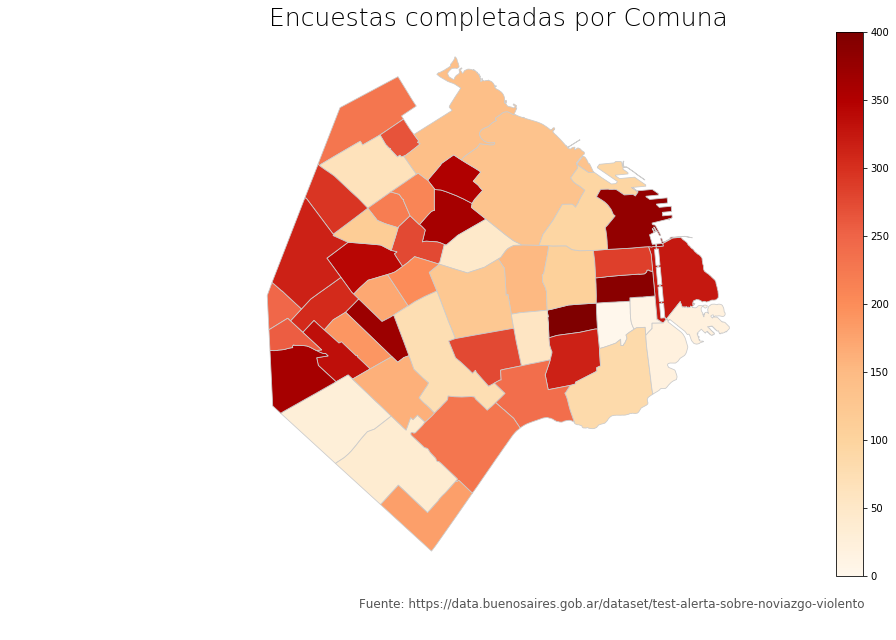

In [72]:
# set the value column that will be visualised
variable = 'barrio_completo'# set the range for the choropleth values
vmin, vmax = 0, 400# create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(30, 10))# remove the axis
ax.axis('off')


# create figure and axes for Matplotlib
#fig, ax = plt.subplots(figsize=(10, 5))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('Encuestas completadas por Comuna', fontdict={'fontsize': '25', 'fontweight' : '5'})
ax.annotate('Fuente: https://data.buenosaires.gob.ar/dataset/test-alerta-sobre-noviazgo-violento', xy=(0.4, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap= "OrRd" , norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
vecescompletadaporbarrio.plot(column="barrio_completo", cmap= "OrRd" , linewidth=0.8, ax=ax, edgecolor='0.8')
fig.savefig("encuestascompletasporcomuna.png", dpi=300)

In [27]:
#import plotly.express as px
#fig = px.density_mapbox(vecescompletadaporbarrio, lat='Latitude', lon='Longitude', z='Magnitude', radius=10,
#                        center=dict(lat=0, lon=180), zoom=0,
#                        mapbox_style="stamen-terrain")
#fig.show()


### Probamos de armar uno por edad

In [28]:
df = pd.read_csv("dataset_joined.csv")

In [29]:
#df_r = df[["edad", "genero", "barrio_completo", "hora"]]
#df_r[["barrio_completo"]] = df_r[["barrio_completo"]].apply(lambda x: x.astype(str).str.upper())

In [30]:
gruposdeedad = pd.cut(df_r["edad"], bins = (0,25,50,75,100))
#pd.cut(df['Age'], bins=[19, 40, 65, np.inf])
#df_r["gruposdeedad"] = gruposdeedad

NameError: name 'df_r' is not defined

In [ ]:
promedioporbarrio = df_r.groupby(["barrio_completo"]).edad.mean()
promedioporbarrio = pd.DataFrame(promedioporbarrio, dtype=np.int8)
#promedioporbarrio.to_csv("promedioporbarrio.csv")
promedioporbarrio.reset_index(inplace=True)
promedioporbarrio.head(3)

In [ ]:
#promedioporbarrio.plot.barh(figsize=(10,20))
#plt.show()


#import plotly.express as px
#fig = px.bar(promedioporbarrio, x='edad', y='edad')
#fig.show()


import plotly.express as px

fig = px.bar(promedioporbarrio, y='edad', x='barrio_completo', text='edad')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

### Prueba

In [34]:
aa = pd.read_csv("dataset_joined.csv").drop(columns=['Unnamed: 0', 'pregunta_1',
       'pregunta_2', 'pregunta_3', 'pregunta_4', 'pregunta_5', 'pregunta_6',
       'pregunta_7', 'pregunta_8', 'pregunta_9', 'pregunta_10', 'pregunta_11',
       'pregunta_12', 'pregunta_13', "barrio",
       'poblacion_por_barrio'])
aa_mujer_mask = aa.genero == "Mujer"
aa_mujer = aa[aa_mujer_mask]
aa_mujer= aa_mujer.apply(lambda x: x.astype(str).str.upper())
aa_mujer.rename(columns = {'barrio_completo':'BARRIO'}, inplace = True) 
aa_mujer.head(3)

,fecha,hora,edad,genero,BARRIO
0,2019-06-14,09:09:00,27,MUJER,CONSTITUCION
1,2019-06-13,23:20:00,17,MUJER,COGHLAN
2,2019-06-13,16:33:00,15,MUJER,RECOLETA


In [35]:
barrio = gpd.read_file("barrios_badata.shp").drop(columns=["OBJETO"])
barrio.head(3)

,BARRIO,COMUNA,PERIMETRO,AREA,geometry
0,CHACARITA,15.0,7724.852955,3.115707e+06,"POLYGON ((100961.338 103691.974, 100884.721 10..."
1,PATERNAL,15.0,7087.513295,2.229829e+06,"POLYGON ((99791.104 103628.888, 99787.132 1036..."
2,VILLA CRESPO,15.0,8131.857075,3.615978e+06,"POLYGON ((103627.714 103487.358, 103517.533 10..."


In [36]:
mujeres_por_barrio = gpd.GeoDataFrame(pd.merge(barrio, aa_mujer))
mujeres_por_barrio.head(3)

,BARRIO,COMUNA,PERIMETRO,AREA,geometry,fecha,hora,edad,genero
0,CHACARITA,15.0,7724.852955,3.115707e+06,"POLYGON ((100961.338 103691.974, 100884.721 10...",2019-06-10,06:14:00,33,MUJER
1,CHACARITA,15.0,7724.852955,3.115707e+06,"POLYGON ((100961.338 103691.974, 100884.721 10...",2019-06-10,05:19:00,26,MUJER
2,CHACARITA,15.0,7724.852955,3.115707e+06,"POLYGON ((100961.338 103691.974, 100884.721 10...",2019-06-09,23:06:00,22,MUJER


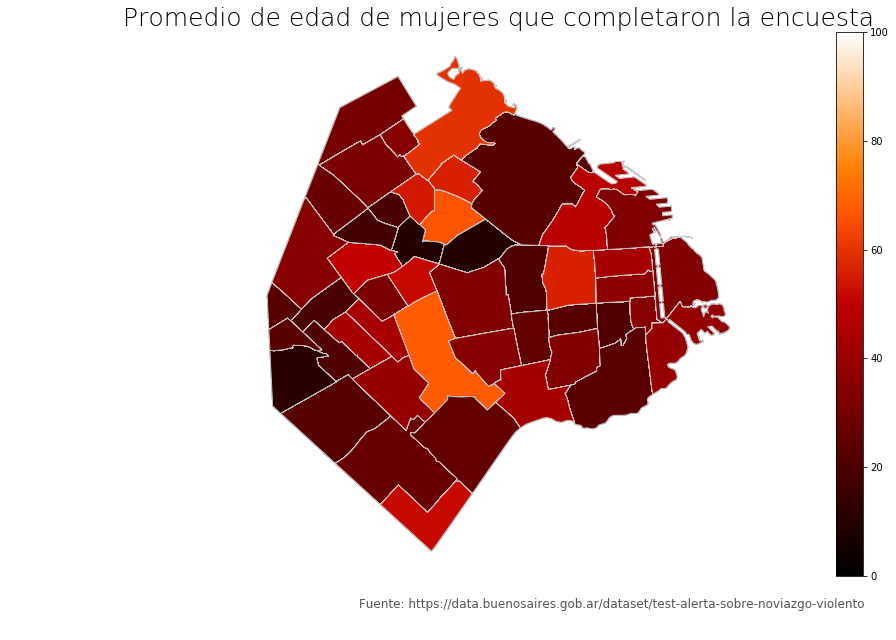

In [60]:
# set the value column that will be visualised
variable = 'edad'# set the range for the choropleth values
vmin, vmax = 0, 100# create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(30, 10))# remove the axisAR

ax.axis('off')


# create figure and axes for Matplotlib
#fig, ax = plt.subplots(figsize=(10, 5))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('Promedio de edad de mujeres que completaron la encuesta', fontdict={'fontsize': '25', 'fontweight' : '5'})
ax.annotate('Fuente: https://data.buenosaires.gob.ar/dataset/test-alerta-sobre-noviazgo-violento', xy=(0.4, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='gist_heat', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
mujeres_por_barrio.plot(column=variable, cmap="gist_heat", linewidth=0.8, ax=ax, edgecolor='0.8')
fig.savefig("promediodeedaddemujeresquecompletaronlaencuesta.png", dpi=300)

In [38]:
aa_varon_mask = aa.genero == "Hombre"
aa_varon = aa[aa_varon_mask]
aa_varon= aa_varon.apply(lambda x: x.astype(str).str.upper())
aa_varon.rename(columns = {'barrio_completo':'BARRIO'}, inplace = True) 
aa_varon.head(3)

,fecha,hora,edad,genero,BARRIO
4,2019-06-13,14:29:00,39,HOMBRE,ALMAGRO
14,2019-06-12,11:25:00,31,HOMBRE,VILLA URQUIZA
15,2019-06-12,03:53:00,36,HOMBRE,AGRONOMIA


In [39]:
varones_por_barrio = gpd.GeoDataFrame(pd.merge(barrio, aa_varon))

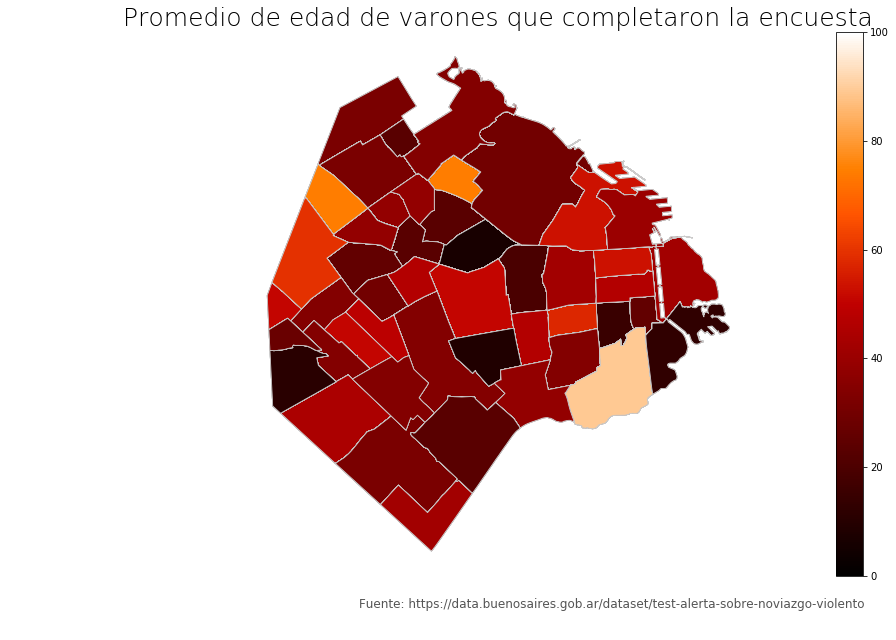

In [61]:
# set the value column that will be visualised
variable = 'edad'# set the range for the choropleth values
vmin, vmax = 0, 100# create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(30, 10))# remove the axis
ax.axis('off')


# create figure and axes for Matplotlib
#fig, ax = plt.subplots(figsize=(10, 5))# remove the axis
ax.axis('off')# add a title and annotation
ax.set_title('Promedio de edad de varones que completaron la encuesta', fontdict={'fontsize': '25', 'fontweight' : '5'})
ax.annotate('Fuente: https://data.buenosaires.gob.ar/dataset/test-alerta-sobre-noviazgo-violento', xy=(0.4, .05), xycoords='figure fraction', fontsize=12, color='#555555')# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='gist_heat', norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it# add the colorbar to the figure
fig.colorbar(sm)# create map
varones_por_barrio.plot(column=variable, cmap="gist_heat", linewidth=0.8, ax=ax, edgecolor='0.8')
fig.savefig("promediodeedaddevaronesquecompletaronlaencuesta.png", dpi=300)

In [41]:
#aa["hora"] = pd.to_datetime(aa["hora"])
aa['hora']

0       09:09:00
1       23:20:00
2       16:33:00
3       16:10:00
4       14:29:00
          ...   
5671    19:29:00
5672    19:27:00
5673    19:26:00
5674    19:06:00
5675    18:51:00
Name: hora, Length: 5676, dtype: object

In [42]:
#pd.to_datetime(df['hora'], format= '/%m/%Y')

### Agarramos TimeStamp con fecha

In [43]:
from datetime import datetime
aa["fecha"]


0       2019-06-14
1       2019-06-13
2       2019-06-13
3       2019-06-13
4       2019-06-13
           ...    
5671    2018-02-14
5672    2018-02-14
5673    2018-02-14
5674    2018-02-14
5675    2018-02-14
Name: fecha, Length: 5676, dtype: object

In [44]:
aa["fecha"]  = pd.to_datetime(aa['fecha'], format='%Y-%m-%d')
# aa["hora"] = pd.to_datetime(aa['hora'], format='%Y-%m-%d')

#date_dt2 = datetime.strptime(date_str2, '%y/%m/%d')

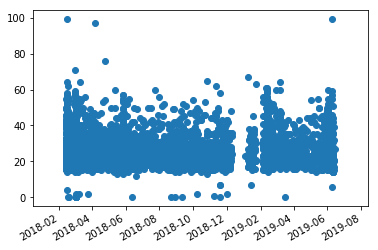

In [45]:
import datetime
import random
import matplotlib.pyplot as plt

# plot
plt.scatter(aa["fecha"],aa["edad"])
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

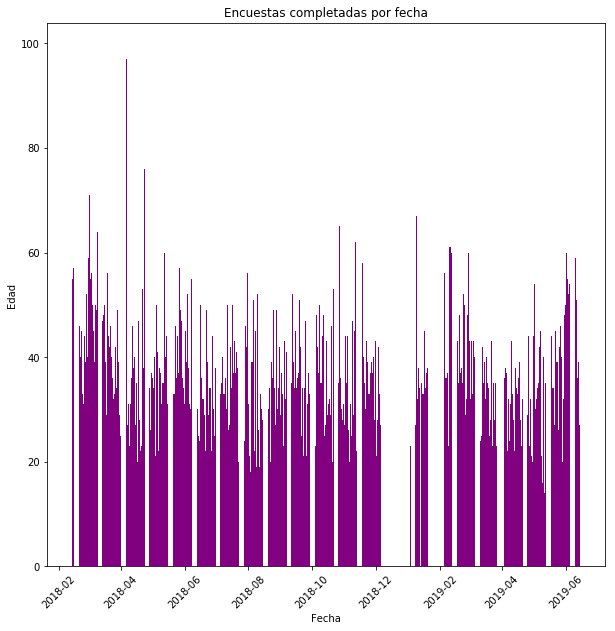

<Figure size 432x288 with 0 Axes>

In [46]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(aa["fecha"],
        aa["edad"],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Fecha",
       ylabel="Edad",
       title="Encuestas completadas por fecha")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()
plt.savefig('encuestascompletadasporfecha.png')

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = ['2018-01-01', '2018-01-01', '2018-02-01', '2018-04-01', '2018-01-02',
     '2018-01-31', '2018-02-13', '2018-04-19']

fig = make_subplots(rows=3, cols=2)

trace0 = go.Histogram(x=x, nbinsx=4)
trace1 = go.Histogram(x=x, nbinsx = 8)
trace2 = go.Histogram(x=x, nbinsx=10)
trace3 = go.Histogram(x=x,
                      xbins=dict(
                      start='1969-11-15',
                      end='1972-03-31',
                      size='M18'), # M18 stands for 18 months
                      autobinx=False
                     )
trace4 = go.Histogram(x=x,
                      xbins=dict(
                      start='1969-11-15',
                      end='1972-03-31',
                      size='M4'), # 4 months bin size
                      autobinx=False
                      )
trace5 = go.Histogram(x=x,
                      xbins=dict(
                      start='1969-11-15',
                      end='1972-03-31',
                      size= 'M2'), # 2 months
                      autobinx = False
                      )

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.show()

In [ ]:
aa_mujer2 = aa_mujer[["genero","fecha"]]
aa_varon2 =  aa_varon[["genero","fecha"]]

In [ ]:
otro_mask = aa.genero == "Otro"
aa_otro = aa[otro_mask]
aa_otro.describe()

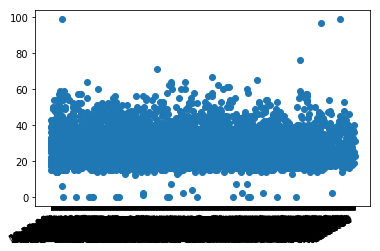

In [58]:
import datetime
import random
import matplotlib.pyplot as plt

# plot
plt.scatter(aa["hora"],aa["edad"])
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [121]:
aver = aa[["fecha","hora","genero"]]

In [126]:
aver.groupby(["genero"])

In [127]:
aver

,fecha,hora,genero
0,2019-06-14,09:09:00,Mujer
1,2019-06-13,23:20:00,Mujer
2,2019-06-13,16:33:00,Mujer
3,2019-06-13,16:10:00,Mujer
4,2019-06-13,14:29:00,Hombre
...,...,...,...
5671,2018-02-14,19:29:00,Mujer
5672,2018-02-14,19:27:00,Mujer
5673,2018-02-14,19:26:00,Mujer
5674,2018-02-14,19:06:00,Mujer


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(days,y)
plt.gcf().autofmt_xdate()
plt.show()